# Hide or remove content

It's possible to control which content shows up in your book. For example,
you may want to display a complex visualization to illustrate an idea, but don't
want the page to be cluttered with a large code cell that generated the visualization.
In other cases, you may want to remove a code cell entirely.

In this case, you have two options:

* **Hiding** content provides a button that lets readers reveal the content.
* **Removing** content prevents it from making it into your book. It
  will be entirely gone (though still present in the source files)

There are two ways to hide content:

* To hide Markdown, use the `{toggle}` directive.
* To hide or remove code cells or their outputs, use **notebook cell tags**.

We'll cover each alternative below.

:::{seealso}
[](jupyter-cell-tags)
:::

## Hide Markdown using MyST Markdown

There are two ways to hide Markdown content

* you can use the `{toggle}` directive to hide arbitrary blocks of content
* you can use the `dropdown` class with admonitions to turn them into dropdowns

Both allow you to wrap chunks of Markdown in a button that lets users show
and hide the content.

### The `{toggle}` directive

You can activate a toggleable behavior in Markdown with the `{toggle}`
directive like so:

````md
```{toggle}
Some hidden toggle content!

![](../images/cool.jpg)
```
````

This results in:

```{toggle}
Some hidden toggle content!

![](../images/cool.jpg)
```

Note that if you'd like to **show the toggle content by default**, you can
add the `:show:` flag when you use `{toggle}`, like so:

````md
```{toggle} Click the button to reveal!
:show:
Some hidden toggle content!

![](../images/cool.jpg)
```
````

### Toggle admonition content with dropdowns

You can also **add toggle buttons to admonition blocks**, effectively making them
dropdown blocks. Users will see the admonition title, but will need to click
in order to reveal the content. To do so, add the `dropdown` class to any admonition.
For example, the code

````md
```{admonition} Click the button to reveal!
:class: dropdown
Some hidden toggle content!

![](../images/cool.jpg)
```
````

results in:

```{admonition} Click the button to reveal!
:class: dropdown
Some hidden toggle content!

![](../images/cool.jpg)
```

See {ref}`content/toggle-admonitions` for more information on admonition dropdowns.

## Hide code cell content

You can hide most cell elements of a page. The sections below describe how
to hide each using cell tags in MyST Markdown.
If you're working with `.ipynb` files, see [the cell tags guide](jupyter-cell-tags)
on adding cell tags to notebooks in Jupyter Notebook or JupyterLab.

If an element is hidden, Jupyter Book will display a small button to the right of the
old location for the hidden element. If a user clicks the button,
the element will be displayed.

### Hide cell inputs

If you add the tag `hide-input` to a cell, then Jupyter Book will hide the cell but
display the outputs.

Here's an example of cell metadata that would trigger the "hide code" behavior:

```json
{
    "tags": [
        "hide-input",
    ]
}
```

For example, notice the cell below contains the `hide-input` tag:

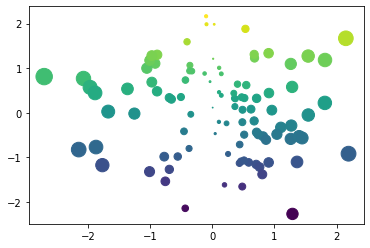

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.ion()

data = np.random.randn(2, 100)
fig, ax = plt.subplots()
ax.scatter(*data, c=data[1], s=100*np.abs(data[0]));

Note how we only see the output by default. Now try clicking the button
to the right of the empty spot above!

### Hide cell outputs

You can also hide the *outputs* of a cell. For example, if you'd like to ask users to
think about what the output will look like first before viewing an answer. To do so,
add the following tag to your cell:

```json
{
    "tags": [
        "hide-output"
    ]
}
```

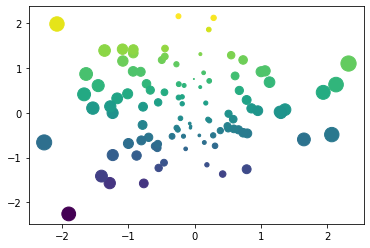

In [2]:
# This cell should have its output hidden!
data = np.random.randn(2, 100)
fig, ax = plt.subplots()
ax.scatter(*data, c=data[1], s=100*np.abs(data[0]));

### Hide entire code cells

If you'd like to hide the whole code cell (both inputs and outputs) just add this
tag to the cell metadata, like so:

```json
{
    "tags": [
        "hide-cell"
    ]
}
```

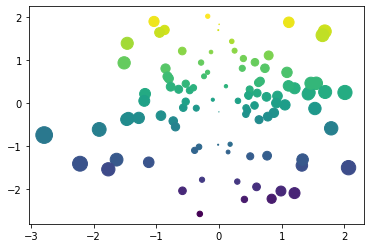

In [3]:
# This cell should have its output hidden!
data = np.random.randn(2, 100)
fig, ax = plt.subplots()
ax.scatter(*data, c=data[1], s=100*np.abs(data[0]));

(hiding/remove-content)=
## Removing code cell content

In the above examples, we are only *hiding* parts of the cell, with the option
that readers can reveal them if they wish. However, if you'd like to completely **remove**
the respective parts, so that their contents do not make it into the book's HTML, you may
use the appropriate `remove-` tags, i.e. `remove-input`, `remove-output` and `remove-cell`.

### Remove cell inputs

The following cell has its inputs removed with `remove-input`. Note that in
this case, there is no button available to show the input contents,
the entire input cell is gone!

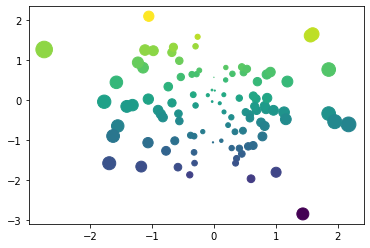

In [4]:
# For example, this cell's inputs will be removed
import numpy as np
import matplotlib.pyplot as plt
plt.ion()

data = np.random.randn(2, 100)
fig, ax = plt.subplots()
ax.scatter(*data, c=data[1], s=100*np.abs(data[0]));

### Remove cell outputs

Similar to hiding inputs, it is also possible to hide the outputs
of a cell with `remove-output`:

```json
{
    "tags": [
        "remove-output"
    ]
}
```

### Remove an entire code cell

You can also remove **both** the inputs and outputs of a cell, in which case it
won't show up in your book at all. These cells remain in the notebook file itself,
so they'll show up if readers click on a {term}`JupyterHub` or {term}`Binder` link from a page.

To remove both the inputs and outputs of a cell, add the tag `remove-cell` to the tags
of the cell. Here's an example of cell metadata that would trigger the "remove cell" behavior:

```json
{
    "tags": [
        "remove-cell"
    ]
}
```

These cells will be entirely removed from each book page - remember that if you'd like to
optionally display the inputs of a cell instead, you should use the `hide-input` tag.

For example, there's a cell below this text that won't make it into the final book,
because it has been removed!

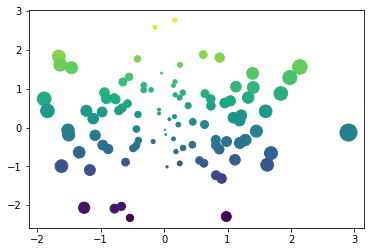

In [5]:
# For example, this entire cell (input and output) will be removed
import numpy as np
import matplotlib.pyplot as plt
plt.ion()

data = np.random.randn(2, 100)
fig, ax = plt.subplots()
ax.scatter(*data, c=data[1], s=100*np.abs(data[0]));

### Remove empty cells

You don't need to do anything to remove empty cells from your pages.
Jupyter Book will remove these automatically. Any cell with *only*
whitespace will be removed.

For example, in the notebook for this page there are two cells above this text.
Both only contain whitespace. Both are gone from
the final output.